In [1]:
#import library dan load data yang diperlukan
import pandas as pd
import numpy as np

df_customer = pd.read_csv('/content/drive/MyDrive/Tugas Mandiri_PT Data Integrasi Inovasi/Soal Data Scientist/customers.csv')
df_product = pd.read_csv('/content/drive/MyDrive/Tugas Mandiri_PT Data Integrasi Inovasi/Soal Data Scientist/products.csv')
df_transaction = pd.read_csv('/content/drive/MyDrive/Tugas Mandiri_PT Data Integrasi Inovasi/Soal Data Scientist/transactions.csv')

#Bagian 1: Rekayasa dan Persiapan Data



##Tampilkan Masing - Masing Data

In [2]:
df_customer.head(10)

,customer_id,join_date,customer_location
0,CUST001,2023-01-15,Jakarta
1,CUST002,2023-01-20,Surabaya
2,CUST003,2023-02-05,Bandung
3,CUST004,2023-02-10,Medan
4,CUST005,2023-03-01,Jakarta
5,CUST006,2023-03-12,Yogyakarta
6,CUST007,2023-01-28,Surabaya
7,CUST008,2023-02-19,NaN
8,CUST009,2023-03-09,Semarang
9,CUST010,2023-03-25,Jakarta


In [3]:
df_product

,product_id,product_name,product_category,price
0,PROD001,Laptop Pro 15,Elektronik,15000000
1,PROD002,Smartphone X,Elektronik,8500000
2,PROD003,Wireless Mouse,Elektronik,250000
3,PROD004,Mechanical Keyboard,Elektronik,800000
4,PROD005,T-Shirt Katun,Pakaian,150000
5,PROD006,Kemeja Flanel,Pakaian,350000
6,PROD007,Celana Jeans,Pakaian,450000
7,PROD008,Sepatu Lari,Olahraga,750000
8,PROD009,Matras Yoga,Olahraga,300000
9,PROD010,Dumbbell 5kg,Olahraga,200000


In [4]:
df_transaction

,transaction_id,customer_id,product_id,timestamp,quantity
0,TRX0001,CUST001,PROD005,1/20/2023 10:05,2.0
1,TRX0002,CUST002,PROD002,1/22/2023 14:30,1.0
2,TRX0003,CUST001,PROD003,2/1/2023 9:15,1.0
3,TRX0004,CUST003,PROD011,2/8/2023 18:45,1.0
4,TRX0005,CUST005,PROD001,3/5/2023 11:20,1.0
...,...,...,...,...,...
493,TRX0494,CUST044,PROD017,11/1/2024 17:00,1.0
494,TRX0495,CUST045,PROD009,12/1/2024 19:00,1.0
495,TRX0496,CUST046,PROD023,1/1/2025 8:00,1.0
496,TRX0497,CUST047,PROD004,2/1/2025 10:00,1.0


In [5]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  498 non-null    object 
 1   customer_id     498 non-null    object 
 2   product_id      498 non-null    object 
 3   timestamp       498 non-null    object 
 4   quantity        496 non-null    float64
dtypes: float64(1), object(4)
memory usage: 19.6+ KB


##Analisa Noise Pada Data

In [6]:
#pipeline untuk profiling dan validasi kualitas data
def cek_df(df):
    return {
        "info": df.info(),   # ini tetap print, karena df.info memang tidak return
        "duplicates": df.duplicated().sum(),
        "missing": df.isna().sum().to_dict()
    }



In [7]:
#cek data customer
result = cek_df(df_customer)
print(result["duplicates"])
print(result["missing"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        100 non-null    object
 1   join_date          100 non-null    object
 2   customer_location  95 non-null     object
dtypes: object(3)
memory usage: 2.5+ KB
0
{'customer_id': 0, 'join_date': 0, 'customer_location': 5}


In [8]:
#cek data product
result = cek_df(df_product)
print(result["duplicates"])
print(result["missing"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        50 non-null     object
 1   product_name      50 non-null     object
 2   product_category  50 non-null     object
 3   price             50 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ KB
0
{'product_id': 0, 'product_name': 0, 'product_category': 0, 'price': 0}


In [9]:
#cek data transaction
result = cek_df(df_transaction)
print(result["duplicates"])
print(result["missing"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  498 non-null    object 
 1   customer_id     498 non-null    object 
 2   product_id      498 non-null    object 
 3   timestamp       498 non-null    object 
 4   quantity        496 non-null    float64
dtypes: float64(1), object(4)
memory usage: 19.6+ KB
0
{'transaction_id': 0, 'customer_id': 0, 'product_id': 0, 'timestamp': 0, 'quantity': 2}


Dari hasil EDA, saya bisa menyimpulkan bahwa data yang dimiliki memiliki beberapa kecacatan yang perlu ditangani sebagai berikut:
1. Kolom join_date pada tabel customer dan timestamp pada tabel transaction memiliki format yang berbeda dan masih bertipe object.
2. Ada nilai Null pada kolom quantity pada tabel transaction dan kolom customer_location pada tabel customer.

perbaikan yang diterapkan:
1. Menyamakan format tanggal pada kolom join_date dan timestamp menjadi dd/mm/yyyy, tanpa menghilangkan keterangan jam pada kolom timestamp
2. mengisi nilai null pada tabel customer dengan nilai modusnya dan transaction dengan nilai rata-rata

##Proses ETL Sederhana

In [10]:
df_transaction["timestamp"] = pd.to_datetime(df_transaction["timestamp"], errors="coerce")
df_customer["join_date"] = pd.to_datetime(df_customer["join_date"], errors="coerce")

# Format timestamp ke dd/mm/yyyy HH:MM
df_transaction["timestamp_fmt"] = df_transaction["timestamp"].dt.strftime("%d/%m/%Y %H:%M")

# Format join_date ke dd/mm/yyyy
df_customer["join_date_fmt"] = df_customer["join_date"].dt.strftime("%d/%m/%Y")

df_customer = df_customer.drop(columns=["join_date"], errors="ignore")
df_transaction = df_transaction.drop(columns=["timestamp"], errors="ignore")

In [11]:
df_transaction["timestamp_fmt"] = pd.to_datetime(df_transaction["timestamp_fmt"], errors="coerce")
df_customer["join_date_fmt"] = pd.to_datetime(df_customer["join_date_fmt"], errors="coerce")

/tmp/ipython-input-3794250986.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_transaction["timestamp_fmt"] = pd.to_datetime(df_transaction["timestamp_fmt"], errors="coerce")
/tmp/ipython-input-3794250986.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_customer["join_date_fmt"] = pd.to_datetime(df_customer["join_date_fmt"], errors="coerce")


In [12]:
df_transaction.fillna(df_transaction["quantity"].mean(), inplace=True)
df_customer.fillna(df_customer["customer_location"].mode()[0], inplace=True)

In [13]:
df_transaction.info()
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  498 non-null    object        
 1   customer_id     498 non-null    object        
 2   product_id      498 non-null    object        
 3   quantity        498 non-null    float64       
 4   timestamp_fmt   498 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 19.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        100 non-null    object        
 1   customer_location  100 non-null    object        
 2   join_date_fmt      100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.5+ KB


In [14]:
#Gabungkan data menjadi tabel analitik
# 1) Gabung transaction dengan customer
df_merged = pd.merge(
    df_transaction,
    df_customer,
    on="customer_id",    # FK-join
    how="left"           # pakai left join biar semua transaksi tetap ada
)

# 2) Gabung hasilnya dengan product
df_merged = pd.merge(
    df_merged,
    df_product,
    on="product_id",     # FK-join
    how="left"
)

# 3) Cek hasil
print(df_merged.head())
print(df_merged.info())

  transaction_id customer_id product_id  quantity       timestamp_fmt  \
0        TRX0001     CUST001    PROD005       2.0 2023-01-20 10:05:00   
1        TRX0002     CUST002    PROD002       1.0 2023-01-22 14:30:00   
2        TRX0003     CUST001    PROD003       1.0 2023-02-01 09:15:00   
3        TRX0004     CUST003    PROD011       1.0 2023-02-08 18:45:00   
4        TRX0005     CUST005    PROD001       1.0 2023-03-05 11:20:00   

  customer_location join_date_fmt         product_name product_category  \
0           Jakarta    2023-01-15        T-Shirt Katun          Pakaian   
1          Surabaya    2023-01-20         Smartphone X       Elektronik   
2           Jakarta    2023-01-15       Wireless Mouse       Elektronik   
3           Bandung    2023-02-05  Novel Fiksi "Senja"             Buku   
4           Jakarta    2023-03-01        Laptop Pro 15       Elektronik   

      price  
0    150000  
1   8500000  
2    250000  
3     95000  
4  15000000  
<class 'pandas.core.frame.

In [15]:
#pembuatan kolom total_price (quantity*price)
df_merged["total_price"] = df_merged["quantity"] * df_merged["price"]
df_merged.head()

,transaction_id,customer_id,product_id,quantity,timestamp_fmt,customer_location,join_date_fmt,product_name,product_category,price,total_price
0,TRX0001,CUST001,PROD005,2.0,2023-01-20 10:05:00,Jakarta,2023-01-15,T-Shirt Katun,Pakaian,150000,300000.0
1,TRX0002,CUST002,PROD002,1.0,2023-01-22 14:30:00,Surabaya,2023-01-20,Smartphone X,Elektronik,8500000,8500000.0
2,TRX0003,CUST001,PROD003,1.0,2023-02-01 09:15:00,Jakarta,2023-01-15,Wireless Mouse,Elektronik,250000,250000.0
3,TRX0004,CUST003,PROD011,1.0,2023-02-08 18:45:00,Bandung,2023-02-05,"Novel Fiksi ""Senja""",Buku,95000,95000.0
4,TRX0005,CUST005,PROD001,1.0,2023-03-05 11:20:00,Jakarta,2023-03-01,Laptop Pro 15,Elektronik,15000000,15000000.0


In [16]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     498 non-null    object        
 1   customer_id        498 non-null    object        
 2   product_id         498 non-null    object        
 3   quantity           498 non-null    float64       
 4   timestamp_fmt      498 non-null    datetime64[ns]
 5   customer_location  498 non-null    object        
 6   join_date_fmt      498 non-null    datetime64[ns]
 7   product_name       498 non-null    object        
 8   product_category   498 non-null    object        
 9   price              498 non-null    int64         
 10  total_price        498 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 42.9+ KB


In [17]:
#Muat data ke database lokal, saya download dataset ini dulu dalam format CSV
df_merged.to_csv("merged_data.csv", index=False, encoding="utf-8")

#Bagian 2: Analisis dan Wawasan
Untuk nomor 1 - 3 saya melanjutkan pada file terpisah yang nantinya akan saya sajikan hasil output dan query SQL yang diminta (file ada di repo github yang saya berikan). Hasil dari pengerjaan tersebut akan saya saji kan di bawah.

Muhammad Farhan Al Hafizh – Tugas Mandiri Bagian 2 No.1-3
1.	Produk Terlaris: Tulis kueri SQL untuk mengidentifikasi 5 produk terlaris berdasarkan total pendapatan (total_price).
MariaDB [transaction_gab_db]> SELECT product_name, SUM(total_price) AS total_sales FROM transaction_gab GROUP BY product_name ORDER BY total_sales DESC LIMIT 5;

Output yang dihasilkan:

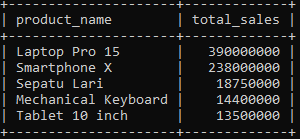

2.	Pelanggan Paling Berharga: Tulis kueri SQL untuk menemukan 10 pelanggan teratas berdasarkan total uang yang mereka habiskan.
MariaDB [transaction_gab_db]> SELECT customer_id, SUM(total_price) AS total_purchase FROM transaction_gab GROUP BY customer_id ORDER BY total_purchase DESC LIMIT 10;

Output Yang dihasilkan:

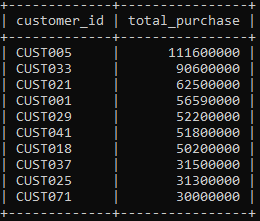

3.	Tren Penjualan Bulanan: Tulis kueri SQL untuk menghitung total pendapatan per bulan.
MariaDB [transaction_gab_db]> SELECT month, SUM(total_price) AS total_revenue FROM transaction_gab GROUP BY month ORDER BY month ASC;

Output Yang dihasilkan:

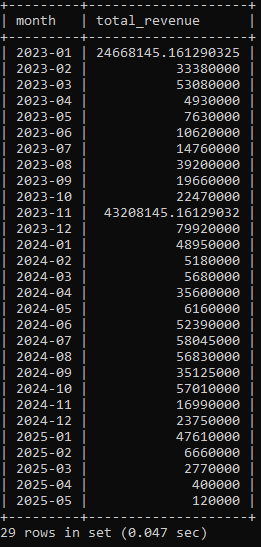




##No.4 Visualisasi Kunci

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


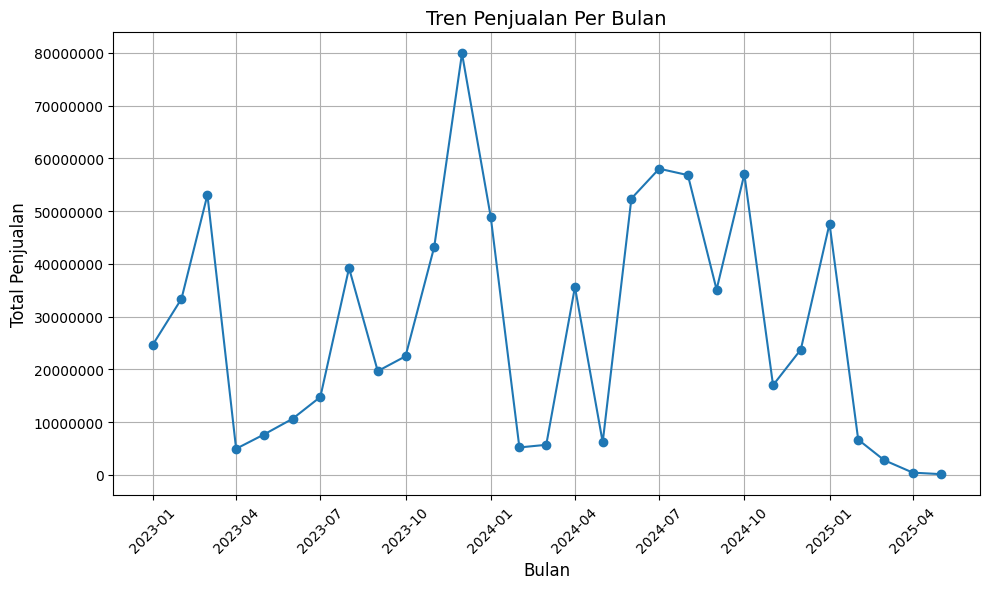

In [19]:
# Buat kolom 'month' untuk agregasi per bulan
df_merged["month"] = df_merged["timestamp_fmt"].dt.to_period("M")

# Hitung total penjualan per bulan
monthly_sales = df_merged.groupby("month")["total_price"].sum().reset_index()

# Ubah kolom month jadi datetime agar bisa dipakai di plot
monthly_sales["month"] = monthly_sales["month"].dt.to_timestamp()

# Visualisasi line chart
plt.figure(figsize=(10,6))
plt.plot(monthly_sales["month"], monthly_sales["total_price"], marker="o")
plt.title("Tren Penjualan Per Bulan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penjualan", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

# Hilangkan notasi ilmiah di sumbu Y
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


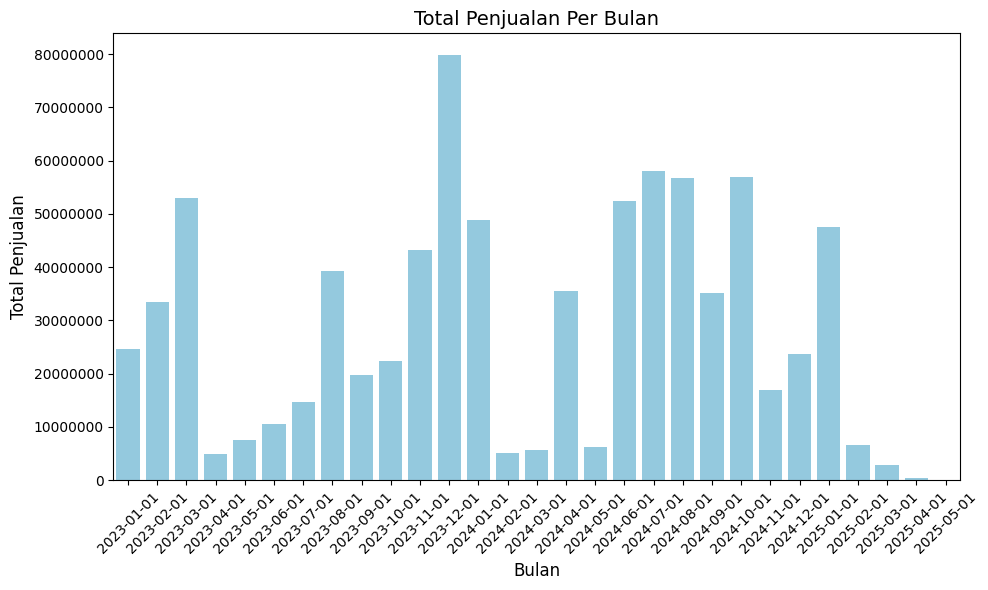

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=monthly_sales, x="month", y="total_price", color="skyblue")

plt.title("Total Penjualan Per Bulan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penjualan", fontsize=12)
plt.xticks(rotation=45)

# Hilangkan notasi ilmiah di sumbu Y
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

In [21]:
df_merged

,transaction_id,customer_id,product_id,quantity,timestamp_fmt,customer_location,join_date_fmt,product_name,product_category,price,total_price,month
0,TRX0001,CUST001,PROD005,2.0,2023-01-20 10:05:00,Jakarta,2023-01-15,T-Shirt Katun,Pakaian,150000,300000.0,2023-01
1,TRX0002,CUST002,PROD002,1.0,2023-01-22 14:30:00,Surabaya,2023-01-20,Smartphone X,Elektronik,8500000,8500000.0,2023-01
2,TRX0003,CUST001,PROD003,1.0,2023-02-01 09:15:00,Jakarta,2023-01-15,Wireless Mouse,Elektronik,250000,250000.0,2023-02
3,TRX0004,CUST003,PROD011,1.0,2023-02-08 18:45:00,Bandung,2023-02-05,"Novel Fiksi ""Senja""",Buku,95000,95000.0,2023-02
4,TRX0005,CUST005,PROD001,1.0,2023-03-05 11:20:00,Jakarta,2023-03-01,Laptop Pro 15,Elektronik,15000000,15000000.0,2023-03
...,...,...,...,...,...,...,...,...,...,...,...,...
493,TRX0494,CUST044,PROD017,1.0,2024-11-01 17:00:00,Jakarta,2024-08-22,Headphone Bluetooth,Elektronik,600000,600000.0,2024-11
494,TRX0495,CUST045,PROD009,1.0,2024-12-01 19:00:00,Makassar,2024-09-05,Matras Yoga,Olahraga,300000,300000.0,2024-12
495,TRX0496,CUST046,PROD023,1.0,2025-01-01 08:00:00,Medan,2024-09-19,Sandal Gunung,Pakaian,280000,280000.0,2025-01
496,TRX0497,CUST047,PROD004,1.0,2025-02-01 10:00:00,Jakarta,2024-10-03,Mechanical Keyboard,Elektronik,800000,800000.0,2025-02


#Bagian 3: Pemikiran Strategis


Tim Pemasaran ingin membuat program untuk meningkatkan retensi pelanggan. Mereka
meminta Anda untuk membantu mengidentifikasi pelanggan yang berisiko churn (berhenti
bertransaksi).


In [23]:
df_merged.head(5)

,transaction_id,customer_id,product_id,quantity,timestamp_fmt,customer_location,join_date_fmt,product_name,product_category,price,total_price,month
0,TRX0001,CUST001,PROD005,2.0,2023-01-20 10:05:00,Jakarta,2023-01-15,T-Shirt Katun,Pakaian,150000,300000.0,2023-01
1,TRX0002,CUST002,PROD002,1.0,2023-01-22 14:30:00,Surabaya,2023-01-20,Smartphone X,Elektronik,8500000,8500000.0,2023-01
2,TRX0003,CUST001,PROD003,1.0,2023-02-01 09:15:00,Jakarta,2023-01-15,Wireless Mouse,Elektronik,250000,250000.0,2023-02
3,TRX0004,CUST003,PROD011,1.0,2023-02-08 18:45:00,Bandung,2023-02-05,"Novel Fiksi ""Senja""",Buku,95000,95000.0,2023-02
4,TRX0005,CUST005,PROD001,1.0,2023-03-05 11:20:00,Jakarta,2023-03-01,Laptop Pro 15,Elektronik,15000000,15000000.0,2023-03


1. Dalam koteks ini saya mendefisinikan churn sebagai aktivitas berhenti berlangganan, dimana seorang customer tidak melakukan pembelian dalam kurun waktu 3 buan (asumsi) atau memiliki rasio pembelian yang kecil.

2. Dalam pembuatan model machine learning ini saya menggunakan model klasifikasi decission tree. hal ini dikarenakan feature engineering (melibatkan perhitungan nilai dari fitur - fitur yang diambil) yang dilakukan sehingga menghasilkan fitur baru untuk mengidentifikasi potensi churn pelanggan cukup rumit, walaupun dari jumlah datanya tidak terlalu bannyak. sehingga saya perlu model klasifikasi yang lebih robust dibanding model yang sederhana seperti linearregression. Selain decission tree, say ajuga menggunakan model clusterisasi yaitu KMeans untuk mengklasterisasi customer karena data bawaan yang diberikan tidak memiliki label. sehingga dengan ini akan mempermudah analisis data ke depannya.

3. Dalam mengidentifikasi customer yang berkemungkinan churn, saya hanya akan mengambil fitur customer_id, timestamp_fmt, join_date_fmt, dan total_price. Dari fitur-fitur tersebut saya akan melakukan feature engineering untuk menunjang proses identifikasi customer yang berpotensi churn.




In [24]:
#bikin feature baru untuk mengambarkan kemungkinan customer churn
df_churn = df_merged[["customer_id", "timestamp_fmt", "join_date_fmt", "total_price"]]

agg_df = (
    df_churn.groupby('customer_id')
    .agg(
        total_purchase=('total_price', 'sum'),
        last_transaction=('timestamp_fmt', 'max'),
        join_date=('join_date_fmt', 'min')
    )
    .reset_index()
)

agg_df['active_days'] = (agg_df['last_transaction'] - agg_df['join_date']).dt.days

agg_df['purchase_ratio'] = agg_df['total_purchase'] / agg_df['active_days']

# Tangani kasus jika active_days = 0 (misal join & transaksi di hari sama)
agg_df['purchase_ratio'] = agg_df['purchase_ratio'].replace([float('inf'), -float('inf')], 0).fillna(0)



In [25]:
agg_df

,customer_id,total_purchase,last_transaction,join_date,active_days,purchase_ratio
0,CUST001,5.659000e+07,2025-01-20 19:00:00,2023-01-15,736,76888.586957
1,CUST002,2.955815e+07,2025-01-05 10:00:00,2023-01-20,716,41282.325644
2,CUST003,1.175000e+06,2024-07-15 13:00:00,2023-02-05,526,2233.840304
3,CUST004,4.330000e+06,2024-07-20 15:00:00,2023-02-10,526,8231.939163
4,CUST005,1.116000e+08,2025-01-25 09:00:00,2023-03-01,696,160344.827586
...,...,...,...,...,...,...
75,CUST076,7.000000e+05,2023-02-10 09:00:00,2023-02-01,9,77777.777778
76,CUST077,9.000000e+05,2023-03-12 10:00:00,2023-03-03,9,100000.000000
77,CUST078,1.500000e+06,2023-04-14 11:00:00,2023-04-04,10,150000.000000
78,CUST079,6.000000e+05,2023-05-16 12:00:00,2023-05-06,10,60000.000000


In [26]:
new_agg_df = agg_df

from sklearn.cluster import KMeans
X = new_agg_df[['purchase_ratio', 'total_purchase', 'active_days']]
kmeans = KMeans(n_clusters=3, random_state=42)
new_agg_df['cluster'] = kmeans.fit_predict(X)


In [29]:
# Tentukan tanggal akhir data (misal transaksi paling baru)
reference_date = df_merged['timestamp_fmt'].max()

new_agg_df['days_since_last_purchase'] = (reference_date - new_agg_df['last_transaction']).dt.days

new_agg_df


,customer_id,total_purchase,last_transaction,join_date,active_days,purchase_ratio,cluster,days_since_last_purchase
0,CUST001,5.659000e+07,2025-01-20 19:00:00,2023-01-15,736,76888.586957,1,100
1,CUST002,2.955815e+07,2025-01-05 10:00:00,2023-01-20,716,41282.325644,1,116
2,CUST003,1.175000e+06,2024-07-15 13:00:00,2023-02-05,526,2233.840304,0,290
3,CUST004,4.330000e+06,2024-07-20 15:00:00,2023-02-10,526,8231.939163,0,285
4,CUST005,1.116000e+08,2025-01-25 09:00:00,2023-03-01,696,160344.827586,2,96
...,...,...,...,...,...,...,...,...
75,CUST076,7.000000e+05,2023-02-10 09:00:00,2023-02-01,9,77777.777778,0,811
76,CUST077,9.000000e+05,2023-03-12 10:00:00,2023-03-03,9,100000.000000,0,781
77,CUST078,1.500000e+06,2023-04-14 11:00:00,2023-04-04,10,150000.000000,0,748
78,CUST079,6.000000e+05,2023-05-16 12:00:00,2023-05-06,10,60000.000000,0,716


In [37]:
new_agg_df['days_since_last_purchase'].max()

827

In [49]:
new_agg_df['is_churn_candidate'] = (
    (new_agg_df['purchase_ratio'] < new_agg_df['purchase_ratio'].quantile(0.25)) |
    (new_agg_df['days_since_last_purchase'] > 180)  # misal lebih dari 1 bulan gak beli
).astype(int)

new_agg_df

,customer_id,total_purchase,last_transaction,join_date,active_days,purchase_ratio,cluster,days_since_last_purchase,is_churn_candidate
0,CUST001,5.659000e+07,2025-01-20 19:00:00,2023-01-15,736,76888.586957,1,100,0
1,CUST002,2.955815e+07,2025-01-05 10:00:00,2023-01-20,716,41282.325644,1,116,0
2,CUST003,1.175000e+06,2024-07-15 13:00:00,2023-02-05,526,2233.840304,0,290,1
3,CUST004,4.330000e+06,2024-07-20 15:00:00,2023-02-10,526,8231.939163,0,285,1
4,CUST005,1.116000e+08,2025-01-25 09:00:00,2023-03-01,696,160344.827586,2,96,0
...,...,...,...,...,...,...,...,...,...
75,CUST076,7.000000e+05,2023-02-10 09:00:00,2023-02-01,9,77777.777778,0,811,1
76,CUST077,9.000000e+05,2023-03-12 10:00:00,2023-03-03,9,100000.000000,0,781,1
77,CUST078,1.500000e+06,2023-04-14 11:00:00,2023-04-04,10,150000.000000,0,748,1
78,CUST079,6.000000e+05,2023-05-16 12:00:00,2023-05-06,10,60000.000000,0,716,1


In [50]:
new_agg_df['is_churn_candidate'].value_counts()

,count
is_churn_candidate,
1,53
0,27


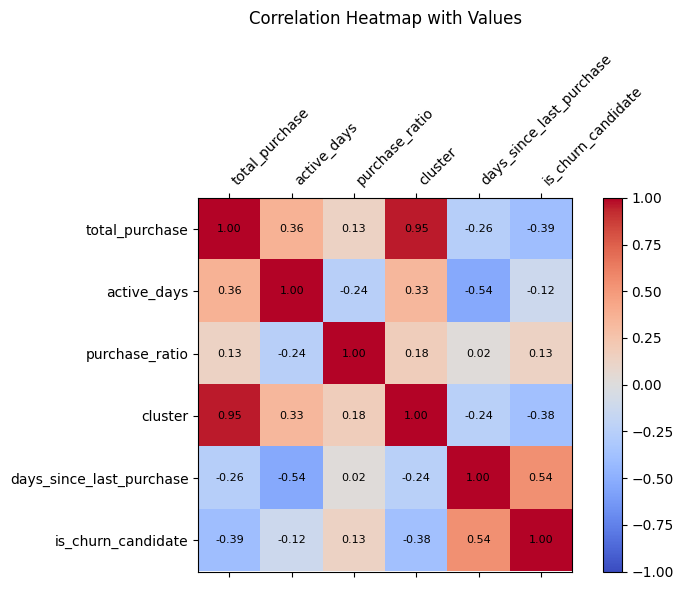

In [54]:
num_cols = new_agg_df.select_dtypes(include=["number"]).columns
corr = new_agg_df[num_cols].corr(method="pearson")

# Plot heatmap
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

# Tambahkan colorbar
fig.colorbar(cax)

# Tambahkan label kolom
ax.set_xticks(np.arange(len(num_cols)))
ax.set_yticks(np.arange(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=45, ha="left")
ax.set_yticklabels(num_cols)

# Tambahkan nilai korelasi di setiap sel
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black', fontsize=8)

# Tambahkan judul dan layout rapih
plt.title("Correlation Heatmap with Values", pad=20)
plt.tight_layout()
plt.show()

Confusion Matrix:
 [[ 8  0]
 [ 0 16]]

Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         8
           1     1.0000    1.0000    1.0000        16

    accuracy                         1.0000        24
   macro avg     1.0000    1.0000    1.0000        24
weighted avg     1.0000    1.0000    1.0000        24

ROC-AUC: 1.0


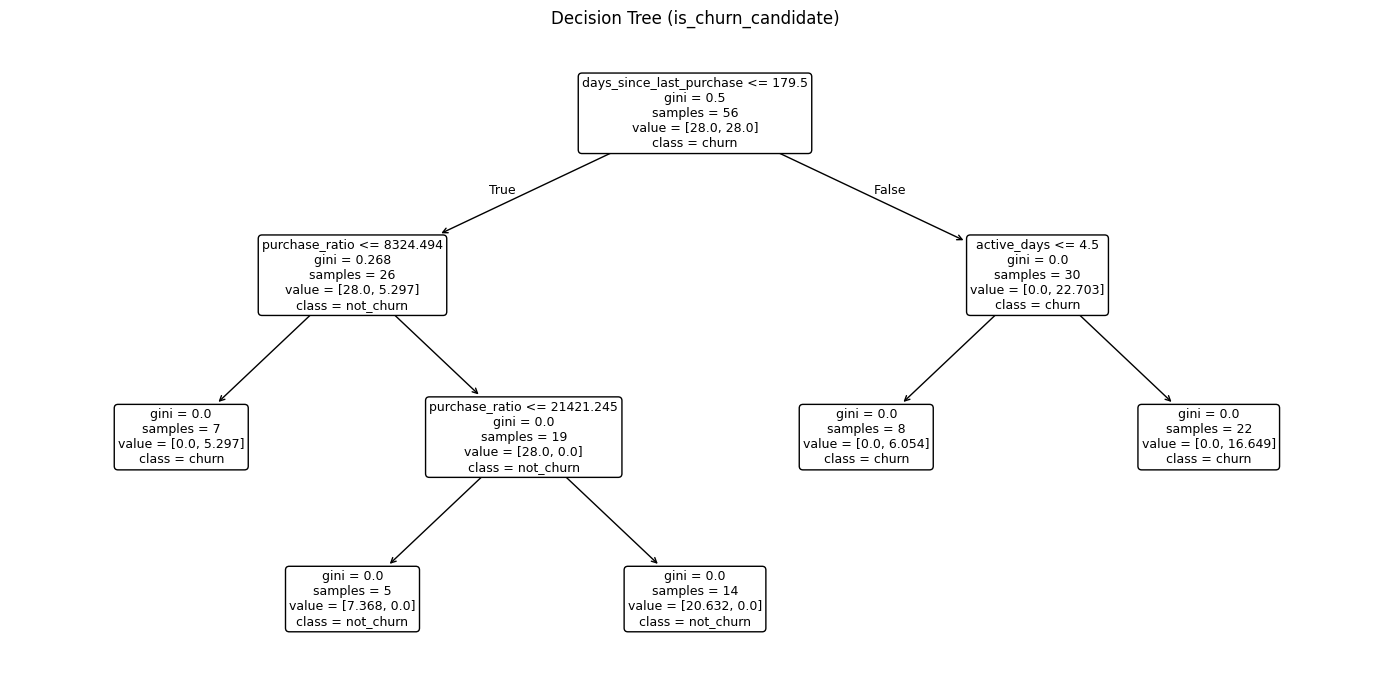

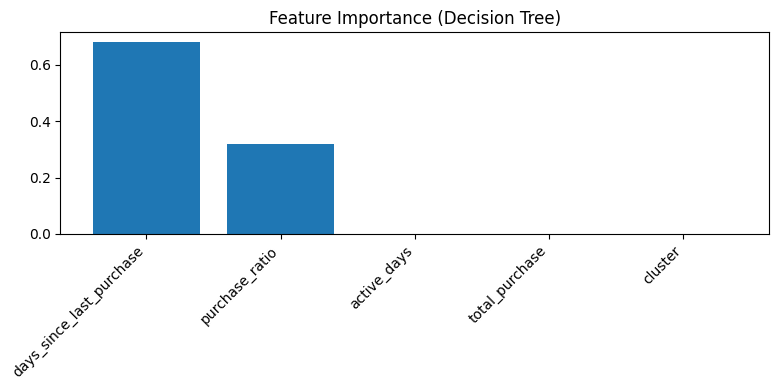

In [56]:
#kolom identifikasi penglanggan yang akan churn sudah dibuat, sekarang saya akan membuat model machine learningnya
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

TARGET = "is_churn_candidate"

# Fitur numerik untuk model (drop target & kolom ID)
X = new_agg_df[num_cols].drop(columns=[TARGET], errors="ignore")
y = new_agg_df[TARGET].astype(int)

# (Opsional) drop kolom yang berpotensi ID/pengenal kuat:
for col in ["cluster"]:  # boleh dipakai, tapi kalau mau murni tanpa fitur turunan, drop aja
    if col in X.columns:
        pass  # atau: X = X.drop(columns=[col])

# Tangani missing dengan median (aman untuk tree juga)
X = X.fillna(X.median(numeric_only=True))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model Decision Tree
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)
clf.fit(X_train, y_train)

# Evaluasi
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Visualisasi pohon (ringkas)
plt.figure(figsize=(14, 7))
plot_tree(
    clf,
    feature_names=list(X.columns),
    class_names=["not_churn", "churn"],
    filled=False,  # tidak set warna khusus
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree (is_churn_candidate)")
plt.tight_layout()
plt.show()

# (Opsional) Feature importance
imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 4))
plt.bar(imp.index, imp.values)
plt.xticks(rotation=45, ha="right")
plt.title("Feature Importance (Decision Tree)")
plt.tight_layout()
plt.show()